<a href="https://colab.research.google.com/github/gabrielcgo/modulo03_BLUE/blob/main/Modulo3_5_projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # para ler o conjunto de imagens.
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image # processador de imagens
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import resnet50
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Carreguei as fotos por conjunto

ak = os.listdir('/content/drive/MyDrive/Grapes/Ak')
ala_idris = os.listdir('/content/drive/MyDrive/Grapes/Ala_Idris')
buzgulu = os.listdir('/content/drive/MyDrive/Grapes/Buzgulu')
dimnit = os.listdir('/content/drive/MyDrive/Grapes/Dimnit')
nazli = os.listdir('/content/drive/MyDrive/Grapes/Nazli')


<BarContainer object of 5 artists>

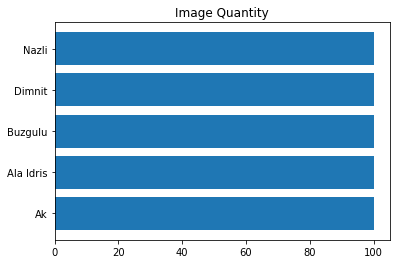

In [ ]:
# Apenas para ver se todas as imagens carregaram e se está balanceada.

count_type = [len(ak),len(ala_idris),len(buzgulu),len(dimnit),len(nazli)]
title = ['Ak','Ala Idris','Buzgulu','Dimnit','Nazli']

plt.title('Image Quantity')
plt.barh(title, count_type)

In [ ]:
# Defini x e y como uma lista

x = []
y = []
img_w, img_h = 32, 32

In [ ]:
# Comecei a carregar as imagens em cada um

for i in ak:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Ak/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(0)

In [ ]:
for i in ala_idris:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Ala_Idris/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(1)

In [ ]:
for i in buzgulu:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Buzgulu/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(2)

In [ ]:
for i in dimnit:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Dimnit/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(3)

In [ ]:
for i in nazli:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Nazli/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(4)

In [ ]:
x = np.asarray(x)
x = x.astype('float32')
x /= 255
y = np.asarray(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print("Loading the ResNet50-ImageNet model")
model = resnet50.ResNet50(input_shape=(32, 32, 3), weights='imagenet', include_top=False)
model = Model(inputs=model.input, outputs=model.get_layer(index=-1).output)

print("\tAdding new layers to the model ...")
newTop = Sequential()
newTop.add(Flatten(input_shape=model.output_shape[1:]))
newTop.add(Dense(10, activation='softmax'))

print("\tSet fine-tuning configuration...")
model = Model(inputs=model.input, outputs=newTop(model.output))
model.summary()


model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Loading the ResNet50-ImageNet model
94781440/94765736 [==============================] - 1s 0us/step
	Adding new layers to the model ...
	Set fine-tuning configuration...
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNorm

In [ ]:
batch_size = 32
number_epochs = 10

print("Training the model ...")
batches = list(range(0, len(y_train), batch_size))
perm = np.random.permutation(len(y_train))

errLoss = []
accLoss = []
errLoss.append(1)
accLoss.append(0)

for e in range(0, number_epochs):
    for b in batches:
        if b + batch_size < len(y_train):
            x = x_train[perm[b : b + batch_size]]
            y = y_train[perm[b : b + batch_size]]
        else:
            x = x_train[perm[b : ]]
            y = y_train[perm[b : ]]
        loss = model.train_on_batch(x, y)

    print("\tEpoch %i. [Error, Accuracy]: %.15f, %.15f " % (e+1, loss[0], loss[1]))
    errLoss.append(loss[0])
    accLoss.append(loss[1])

Training the model ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


ValueError: ignored

Ploting training loss ...


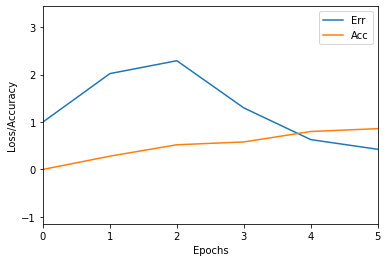

In [ ]:
print("Ploting training loss ...")
plt.plot(errLoss, label="Err")
plt.plot(accLoss, label="Acc")
plt.xlim([0, len(errLoss)-1])
plt.legend(loc='upper right')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epochs')
plt.margins(0.5, 0.5)
plt.show()

In [ ]:
print("Testing the model ...")
acc = model.evaluate(x_test, y_test, batch_size=batch_size)
#print(model.metrics_names)
print("\tTop-1 Accuracy: %f" % acc[1])

Testing the model ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 1s 198ms/step - loss: 4.1620 - accuracy: 0.1000
	Top-1 Accuracy: 0.100000


In [ ]:
for layer in model.layers[:-int(10)]:
    layer.trainable = False

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('\tTraining set shape: ', y_train.shape)
print('\tTesting set shape: ', x_test.shape)
print('\tTraining label shape: ', y_train.shape)
print('\tTesting label shape: ', x_test.shape)

	Training set shape:  (400, 5)
	Testing set shape:  (100, 32, 32, 3)
	Training label shape:  (400, 5)
	Testing label shape:  (100, 32, 32, 3)


In [ ]:
def kerasAugmentation(X, Y, augmentation, qtdade):
  print("\tCreating data augmentation usign Keras ...")
  
  # determinando o gerador das imagens a ser utilizado e sua configuração
  if (augmentation == "Rotation"):
    datagen = ImageDataGenerator(rotation_range=90)
  elif (augmentation == "Shift"):
    datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
  elif (augmentation == "Flip"):
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
    
  images = []
  labels = []

  for i in range(0, X.shape[0]):
    it = datagen.flow(np.expand_dims(X[i], 0), batch_size=1) # passamos 1 imagem por vez
    for j in range(0, qtdade):
      batch = it.next() # selecionamos a próxima imagem gerada
      images.append(batch[0].astype(np.uint8)) # convertemos esta imagem na codificação adequada para o nosso conjunto de dados
      labels.append(Y[i])
      
  images = np.array(images)
  labels = np.array(labels)
  return images, labels

# chamada da função; após, concatenamos os dados gerados aos dados originais
images, labels = kerasAugmentation(x_train, y_train, "Shift", 1)
x_train = np.concatenate((x_train, images), axis=0)
y_train = np.concatenate((y_train, labels), axis=0)

print('\tTraining set shape: ', x_train.shape)
print('\tTesting set shape: ', x_test.shape)
print('\tTraining label shape: ', y_train.shape)
print('\tTesting label shape: ', y_test.shape)

	Creating data augmentation usign Keras ...
	Training set shape:  (800, 32, 32, 3)
	Testing set shape:  (100, 32, 32, 3)
	Training label shape:  (800, 5)
	Testing label shape:  (100, 5)
